<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/Classification_RNN_GRU_LSTM_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



In [1]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from IPython.display import Image
from google.colab.patches import cv2_imshow
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)



# DataSet

11490434/11490434 [==============================] - 0s 0us/step


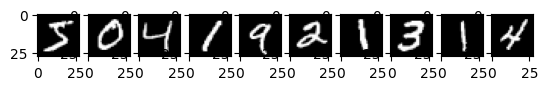

number of training images: 60000
number of test images: 10000


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train.shape-->(60000, 28, 28)
# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

In [4]:
# normalize training, testing dataset.
x_train, x_test = x_train/255.0, x_test/255.0


# **Model RNN**


In [17]:
model = keras.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(None, 28)))
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 6602 (25.79 KB)
Trainable params: 6602 (25.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [14]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

# **Model Train**

In [15]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 1.0917 - accuracy: 0.6452 - val_loss: 0.8009 - val_accuracy: 0.7512
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.5391 - accuracy: 0.8407 - val_loss: 0.4008 - val_accuracy: 0.8855
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3719 - accuracy: 0.8959 - val_loss: 0.2999 - val_accuracy: 0.9159
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2978 - accuracy: 0.9155 - val_loss: 0.3124 - val_accuracy: 0.9114
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2524 - accuracy: 0.9285 - val_loss: 0.2672 - val_accuracy: 0.9211
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2218 - accuracy: 0.9370 - val_loss: 0.3036 - val_accuracy: 0.8997
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2009 - accuracy: 0.9427 - val_loss: 0.1963 - val_accuracy: 0.9424
E

# **Model Evaluation**

In [16]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.16535352170467377
Test accuracy: 0.9527999758720398


# **Model Prediction**

In [15]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 2s 5ms/step
Test prediction: [7 2 1 ... 4 5 6]


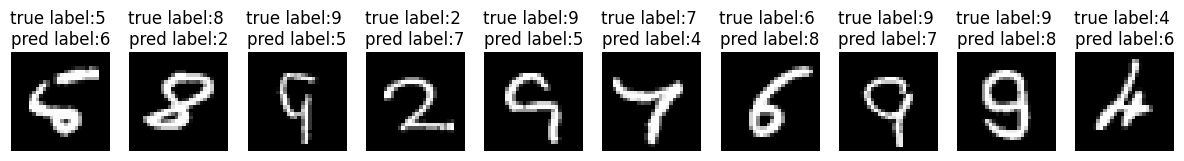

In [16]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


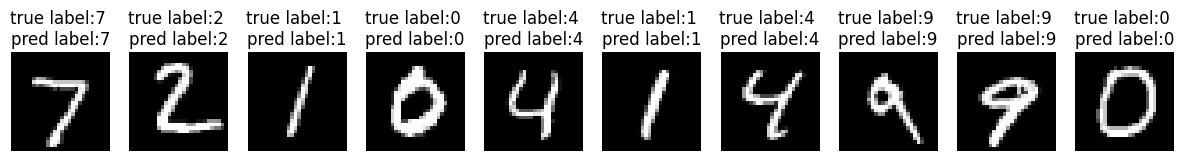

In [17]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


# **Model LSTM**


In [18]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(None, 28)))
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 24458 (95.54 KB)
Trainable params: 24458 (95.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [19]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [20]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 29s 29ms/step - loss: 2.1560 - accuracy: 0.2540 - val_loss: 1.9398 - val_accuracy: 0.3325
Epoch 2/10
938/938 [==============================] - 21s 22ms/step - loss: 1.6644 - accuracy: 0.4529 - val_loss: 1.3540 - val_accuracy: 0.5574
Epoch 3/10
938/938 [==============================] - 20s 21ms/step - loss: 1.0611 - accuracy: 0.6593 - val_loss: 0.8346 - val_accuracy: 0.7400
Epoch 4/10
938/938 [==============================] - 21s 23ms/step - loss: 0.6898 - accuracy: 0.7916 - val_loss: 0.6116 - val_accuracy: 0.8121
Epoch 5/10
938/938 [==============================] - 23s 24ms/step - loss: 0.4868 - accuracy: 0.8562 - val_loss: 0.4934 - val_accuracy: 0.8524
Epoch 6/10
938/938 [==============================] - 21s 22ms/step - loss: 0.3730 - accuracy: 0.8911 - val_loss: 0.3801 - val_accuracy: 0.8898
Epoch 7/10
938/938 [==============================] - 20s 21ms/step - loss: 0.3085 - accuracy: 0.9102 - val_loss: 0.2725 - val_accuracy:

# **Model Evaluation**

In [25]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.21122565865516663
Test accuracy: 0.9386000037193298


# **Model Prediction**

In [26]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 3s 9ms/step
Test prediction: [7 2 1 ... 4 5 6]


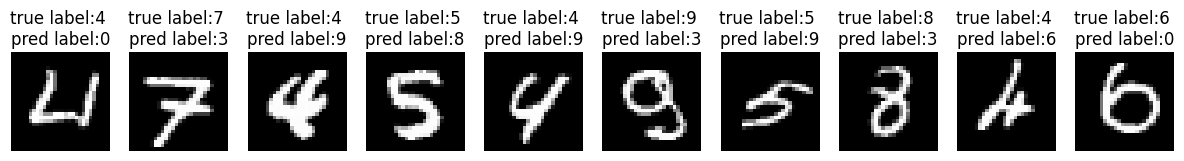

In [27]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


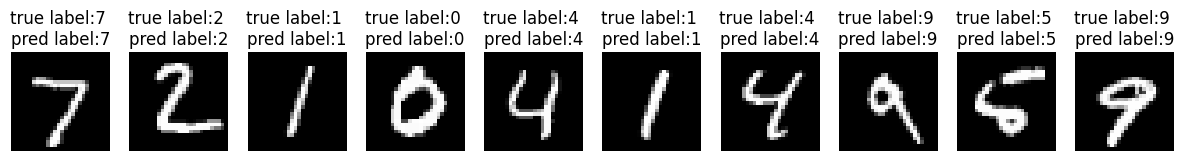

In [28]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


# **Model GRU**


In [29]:
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(None, 28)))
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                18048     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 18698 (73.04 KB)
Trainable params: 18698 (73.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [30]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [31]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 21s 20ms/step - loss: 2.2799 - accuracy: 0.1574 - val_loss: 2.2573 - val_accuracy: 0.2050
Epoch 2/10
938/938 [==============================] - 20s 21ms/step - loss: 2.2065 - accuracy: 0.2552 - val_loss: 2.0984 - val_accuracy: 0.2978
Epoch 3/10
938/938 [==============================] - 19s 20ms/step - loss: 1.9086 - accuracy: 0.3323 - val_loss: 1.7418 - val_accuracy: 0.4044
Epoch 4/10
938/938 [==============================] - 20s 21ms/step - loss: 1.5153 - accuracy: 0.4821 - val_loss: 1.2629 - val_accuracy: 0.5719
Epoch 5/10
938/938 [==============================] - 20s 21ms/step - loss: 1.0923 - accuracy: 0.6188 - val_loss: 0.9606 - val_accuracy: 0.6655
Epoch 6/10
938/938 [==============================] - 20s 21ms/step - loss: 0.8926 - accuracy: 0.6932 - val_loss: 0.8177 - val_accuracy: 0.7303
Epoch 7/10
938/938 [==============================] - 20s 22ms/step - loss: 0.7531 - accuracy: 0.7551 - val_loss: 0.6619 - val_accuracy:

# **Model Evaluation**

In [32]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.33585524559020996
Test accuracy: 0.9003999829292297


# **Model Prediction**

In [33]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 2s 5ms/step
Test prediction: [7 2 1 ... 4 5 6]


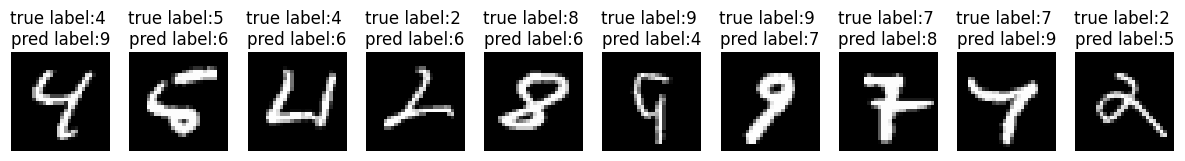

In [34]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


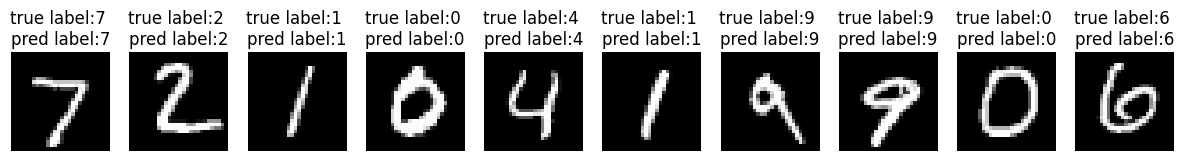

In [35]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1
